In [3]:
# import
import os
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# avoid info and warnings of tf
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [5]:
# helper function1 plot dataset
def plot_data(pl,X,y):
    # plot points where y==0
    pl.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
    # plot points where y==1
    pl.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
    pl.legend(['0','1'])
    return pl

In [6]:
# helper function2 plot the decision boundary learnt
def plot_decision_boundary(model, X,y):
    amin, bmin=X.min(axis=0)-0.1
    amax, bmax=X.max(axis=0)+0.1
    hticks=np.linspace(amin, amax,101)
    vticks=np.linspace(bmin, bmax,101)
    aa, bb=np.meshgrid(hticks,vticks)
    ab=np.c_[aa.ravel(),bb.ravel()]
    c=model.predict(ab)
    z=c.reshape(aa.shape)
    plt.Figure(figsize=(12,8))
    plt.contourf(aa,bb,z,cmp='bwr',aplha=0.2)
    plot_data(plt,X,y)
    return plt

In [7]:
X,y=make_blobs(n_samples=1000,centers=2,random_state=42)

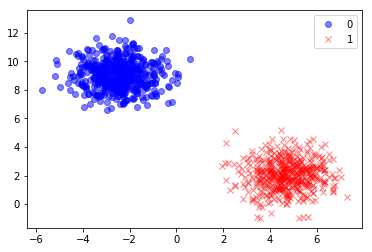

In [8]:
pl=plot_data(plt,X,y)
pl.show()

In [9]:
# lets split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [11]:
# step 1 create simple sequential model
model=Sequential()

In [16]:
# step 2 add layers
model.add(Dense(1,input_shape=(2,),activation="sigmoid"))

In [17]:
# step 3 compile model
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [18]:
# step 4 train model - fit
model.fit(X_train,y_train,epochs=100,verbose=0)

In [19]:
# step 5 evaluate model, run on test
eval_result=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 584us/step


In [20]:
print("test loss: ",eval_result[0],"  test accuracy : ",eval_result[1])

test loss:  0.00011051260381160925   test accuracy :  1.0


C:\Users\bharti\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'cmp', 'aplha'
  s)


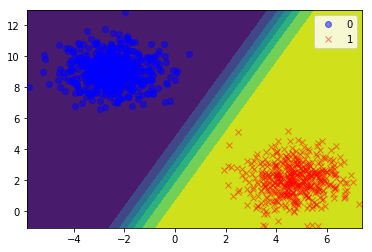

In [22]:
# plot decision boundary of model we learnt
plot_decision_boundary(model,X,y).show()

In [23]:

# reading keras datasets
from keras.datasets import boston_housing, mnist, cifar10, imdb
(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_train2,y_train2),(x_test2,y_test2) = boston_housing.load_data()
(x_train3,y_train3),(x_test3,y_test3) = cifar10.load_data()
(x_train4,y_train4),(x_test4,y_test4) = imdb.load_data(num_words=20000)
num_classes = 10


17465344/17464789 [==============================] - 157s 9us/step
